In [2]:
import numpy as np
import matplotlib.pyplot as plt

# New Section

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')
df.to_csv ('SM_Thermo.csv', index=None)

C:\Users\ashish\AppData\Local\Temp\ipykernel_4180\3188559864.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')


In [5]:
df.head()

,t (s),T_gam (MeV),T_gam/T_nu,g*,gs,a,z_gam,z_nu,N
0,0.007387,10.000000,1.000000,10.736124,10.735804,0.051101,1.000024,1.000024,0.000407
1,0.007524,9.908319,1.000000,10.736112,10.735786,0.051574,1.000025,1.000024,0.000414
2,0.007664,9.817479,1.000000,10.736099,10.735768,0.052051,1.000025,1.000025,0.000421
3,0.007806,9.727472,1.000001,10.736086,10.735749,0.052533,1.000026,1.000025,0.000429
4,0.007952,9.638290,1.000001,10.736073,10.735729,0.053019,1.000026,1.000026,0.000437


In [6]:
z_gam=df["z_gam"]
z_nu=df["z_nu"]
gs=df["gs"]
g=df["g*"]
m_e=0.511
m_p=1.2*10**(22)



Text(0.5, 1.0, 't (s) vs $ z_{\\gamma}$')

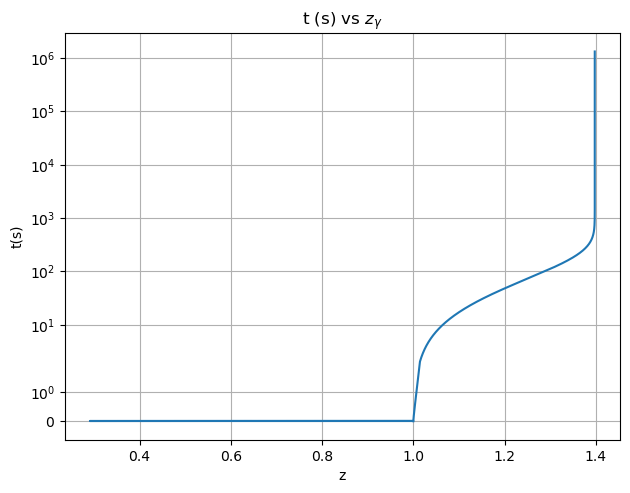

In [7]:
plt.plot(z_gam,df["t (s)"])

plt.yscale('symlog')
#plt.xscale('symlog')
plt.xlabel("z")
plt.ylabel("t(s)")
plt.tight_layout()
plt.grid("True")
plt.title(r't (s) vs $ z_{\gamma}$')

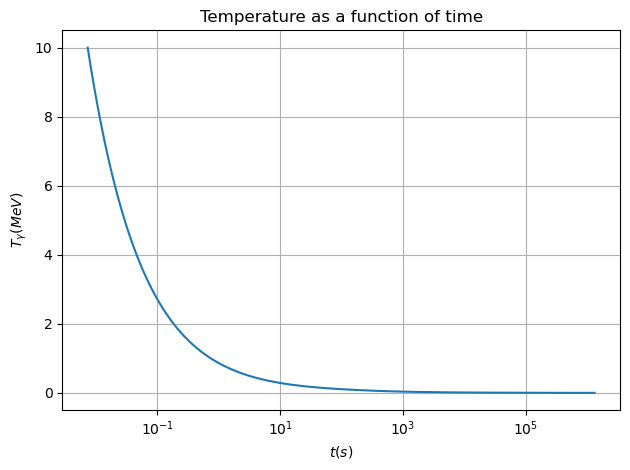

In [8]:
plt.plot(df["t (s)"],df["T_gam (MeV)"])
plt.xscale('log')
plt.title('Temperature as a function of time')
plt.ylabel(r'$T_{\gamma}(MeV)$')
plt.xlabel(r'$t (s)$')
plt.grid(True)
plt.tight_layout()

### 3. Redshift in neutrino as a function of time

Text(0.5, 1.0, 't (s) vs $ z_{\\nu}$')

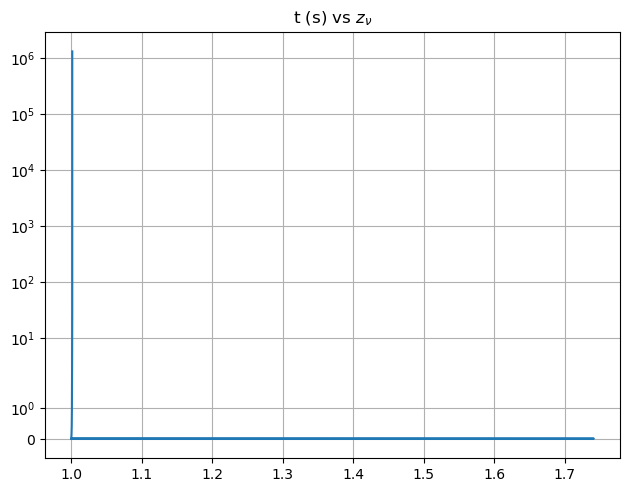

In [9]:
plt.plot(z_nu,df["t (s)"])
plt.yscale('symlog')
plt.tight_layout()
plt.grid("True")
plt.title(r't (s) vs $ z_{\nu}$')

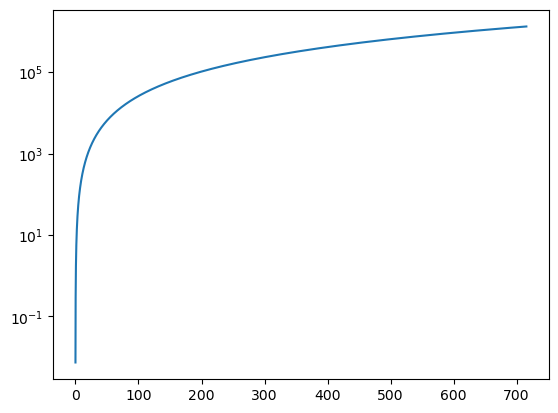

In [64]:
plt.plot(z_new,df["t (s)"])
plt.yscale('log')


* Trying to Plot $dz/dt$

In [10]:
z_new=np.multiply(df['z_nu'],df['a'])

In [11]:
def gprime_s(df):
    x=[]
    for i in range(0,1000,1):
        if(z_new[i+1]!=z_new[i]):
            x.append((df["gs"][i+1]-df["gs"][i])/(z_new[i+1]-z_new[i]))
        else:
            x.append(x[i-1])
    return x

In [12]:
x=gprime_s(df)
x.append(0)
    

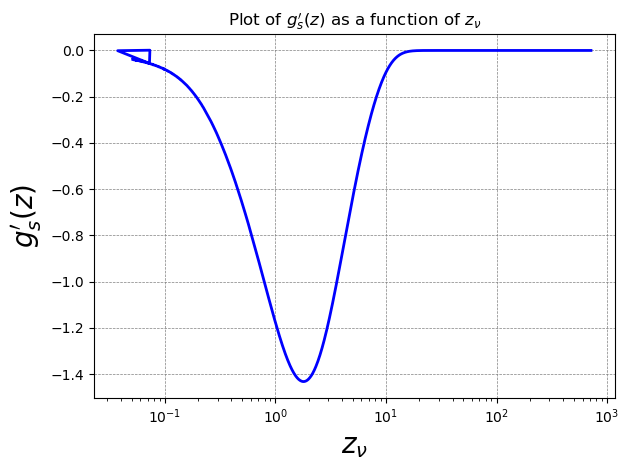

In [111]:
plt.plot(z_new, x, color='blue', linewidth=2)
plt.xscale('log')
plt.xlabel(r'$z_\nu$',fontsize=20)
plt.ylabel(r'$g^{\prime}_{s}(z)$',fontsize=20)
plt.title(r'Plot of $g^{\prime}_{s}(z)$ as a function of $z_\nu$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()

* Trying to plot from the functional form of Temperature $tT^{2}=\frac{2.4}{\sqrt(g(T))}$

In [14]:
t=2.4*np.divide(np.sqrt(g),df["T_gam (MeV)"])

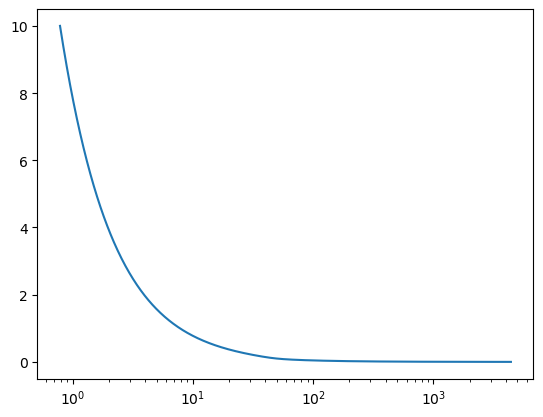

In [15]:
plt.plot(t,df["T_gam (MeV)"])
plt.xscale("log")

In [16]:
print(df["T_gam (MeV)"])

0       10.000000
1        9.908319
2        9.817479
3        9.727472
4        9.638290
          ...    
996      0.001038
997      0.001028
998      0.001019
999      0.001009
1000     0.001000
Name: T_gam (MeV), Length: 1001, dtype: float64


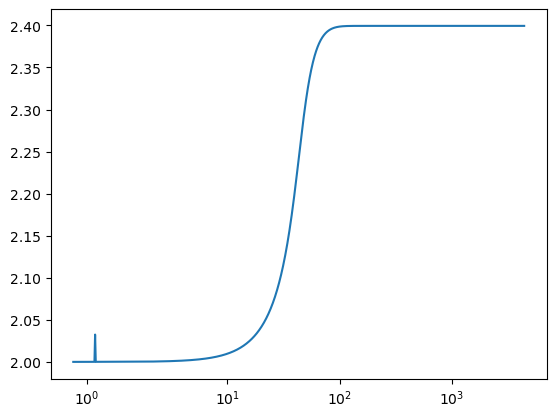

In [17]:
z_tot=z_nu+z_gam
plt.plot(t,z_tot)
plt.xscale("symlog")

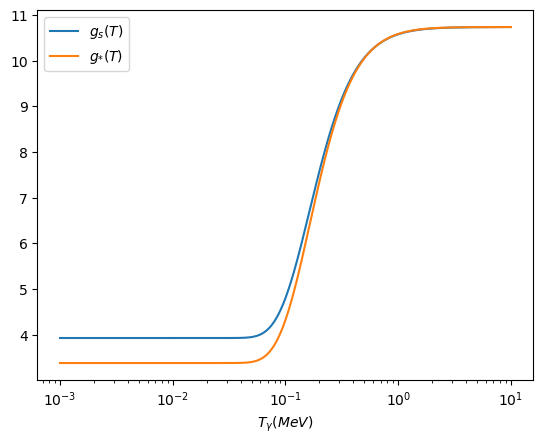

In [18]:
plt.plot(df["T_gam (MeV)"],gs,label=r'$g_s(T)$')
plt.plot(df["T_gam (MeV)"],g,label=r'$g_{*}(T)$')
plt.xlabel(r'$T_{\gamma} (MeV)$')
plt.xscale("log")
plt.legend()

Text(0, 0.5, '$g_{s}(z)$')

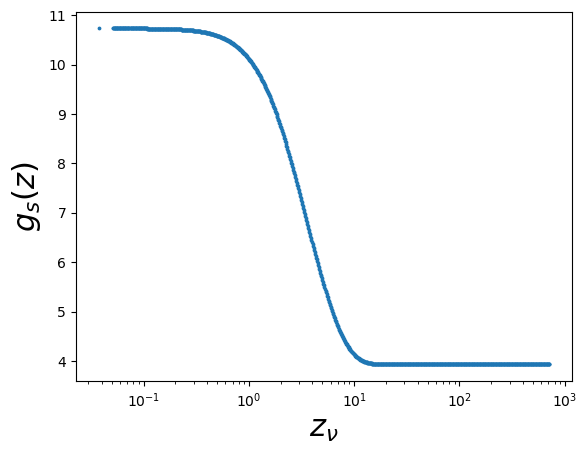

In [19]:
z_new=np.multiply(df['z_nu'],df['a'])
plt.scatter(z_new,gs,s=3)
plt.xscale('log')
plt.xlabel(r'$z_{\nu}$',fontsize=22)
plt.ylabel(r'$g_{s}(z)$',fontsize=22)

In [20]:
len(z_new)

1001

In [21]:
z_new[1]

0.051575329935496704

###  Plotting:  $\frac{dt}{dz}=\frac{\bigg(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\bigg)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

## $\frac{m_{pl}}{m_{e}^{2}}=\frac{1.22 \times 10^{22}}{(0.511)^{2}}$

In [22]:
cons=1.22*10**(22)/(0.511)**2

In [23]:
df['gs']/df['a']


0       210.088979
1       208.162405
2       206.253493
3       204.362067
4       202.487968
           ...    
996       0.005709
997       0.005657
998       0.005605
999       0.005554
1000      0.005503
Length: 1001, dtype: float64

In [24]:
np.divide(df['gs'],df['a'])

0       210.088979
1       208.162405
2       206.253493
3       204.362067
4       202.487968
           ...    
996       0.005709
997       0.005657
998       0.005605
999       0.005554
1000      0.005503
Length: 1001, dtype: float64

In [25]:
func=cons*((z_new**(2))*1/3*np.divide(x,df['gs'])+z_new)/(1.66*np.sqrt(df['g*']))

In [26]:
print(func)

0       4.389363e+20
1       4.429985e+20
2       4.470968e+20
3       4.512330e+20
4       4.554105e+20
            ...     
996     1.055093e+25
997     1.064855e+25
998     1.074708e+25
999     1.084652e+25
1000    1.094689e+25
Length: 1001, dtype: float64


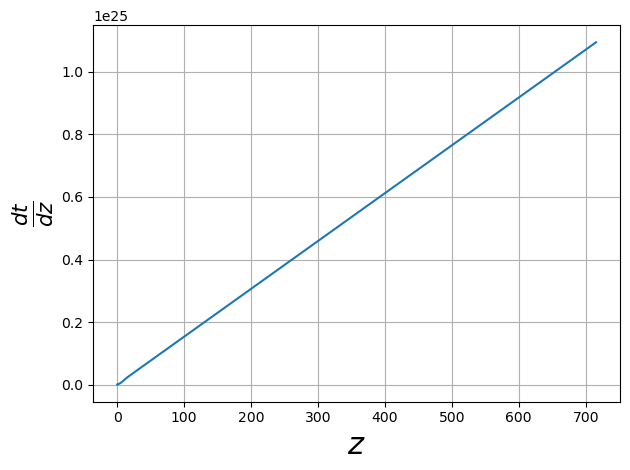

In [106]:
plt.plot(z_new,func)
#plt.title(r'$\frac{dt}{dz} v/s z$')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'$\frac{dt}{dz}$',fontsize=22)
plt.xlabel(r'$z$',fontsize=22)
plt.grid(True)
plt.tight_layout()


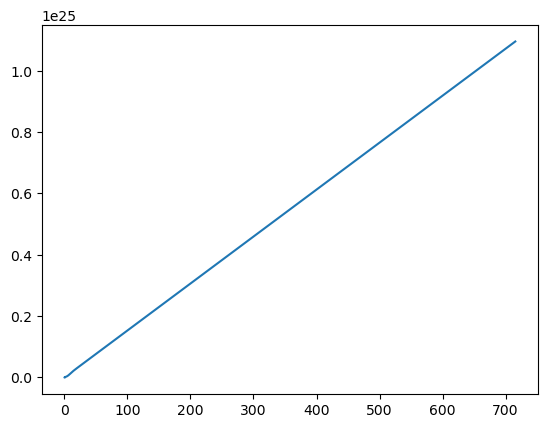

In [28]:
plt.plot(z_new,func)

In [29]:
from scipy import interpolate

In [30]:
f=interpolate.interp1d(z_new,gs)


In [31]:
x_new=np.linspace(0.04,715,10000)

In [32]:
ynew=f(x_new)

In [33]:
print(ynew)

[10.73492477 10.73190215 10.72205554 ...  3.9306568   3.9306568
  3.9306568 ]


Text(0.5, 1.0, 'Interpolated $g_{s}(z)-z_{\\nu}$')

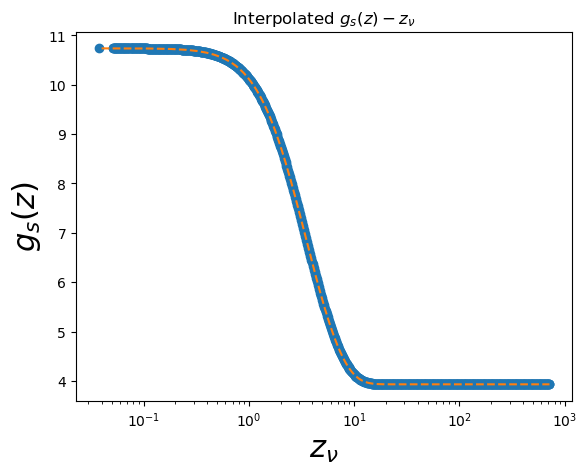

In [34]:
plt.plot(z_new,df['gs'],'o',x_new,ynew,'--')
plt.xscale('log')
plt.xlabel(r'$z_{\nu}$',fontsize=22)
plt.ylabel(r'$g_{s}(z)$',fontsize=22)
plt.title(r'Interpolated $g_{s}(z)-z_{\nu}$')

In [35]:
def gprime_iplot(f,i):
    diff=(float(f(i+10**(-4)))-float(f(i)))/(10**(-4))
    return diff

In [36]:
new_y=[]
for i in range(0,1000,1):
    if(z_new[i+1]!=z_new[i]):
        new_y.append(gprime_iplot(f,z_new[i]))
    else:
        new_y.append(new_y[i-1])
new_y.append(0.0)

In [37]:
func2=cons*((z_new**(2))*1/3*np.divide(new_y,df['gs'])+z_new)/(1.66*np.sqrt(df['g*']))

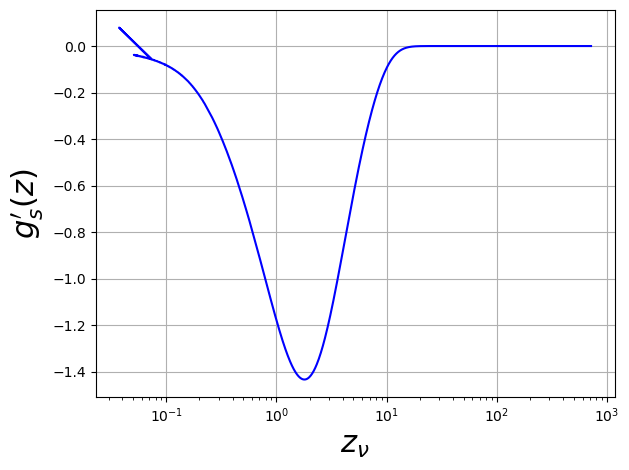

In [112]:
plt.plot(z_new,new_y,color='b')
plt.xscale('log')
plt.ylabel(r'$g^{\prime}_{s}(z)$',fontsize=22)
plt.xlabel(r'$z_\nu$',fontsize=22)
plt.grid(True)
plt.tight_layout()

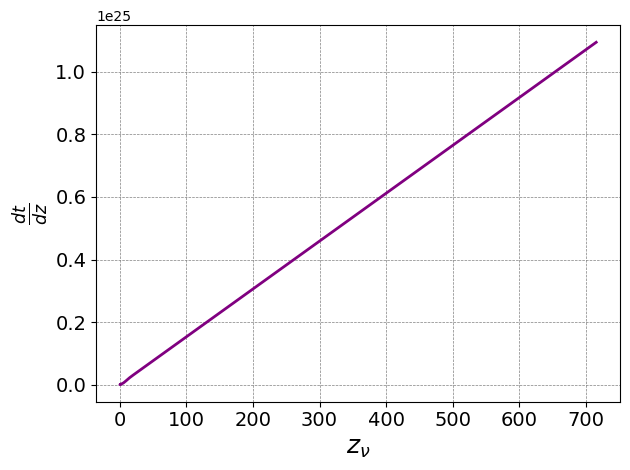

In [116]:
plt.plot(z_new, func2, color='purple', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\nu}$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


In [43]:
# solving for dt/dz
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [44]:
min(z_new)

0.0374143495003448

In [46]:
integral=cumulative_trapezoid(func2,z_new,initial=0.0374143495003448)

### Given:

$\frac{dt}{dz} = \frac{\left(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

### Let:

$f(z) = \frac{\left(-z^{2}\frac{1}{3}\frac{g^{\prime}_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

$\implies$

$\int dt = \int f(z) \, dz$


Text(0.5, 1.0, 'Time as a function of z,  $ t \\,(z) $')

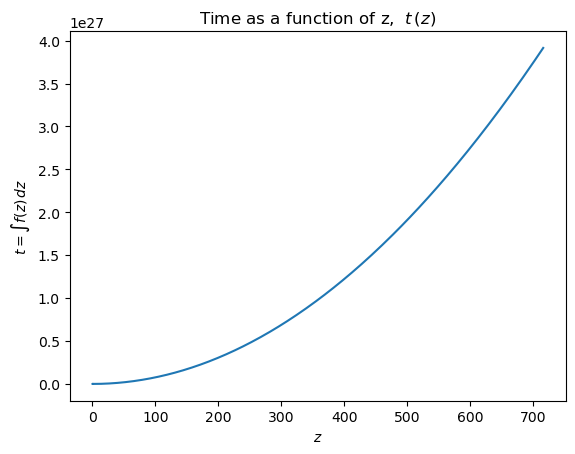

In [117]:
plt.plot(z_new,integral)
plt.ylabel(r'$t=\int f (z) \,dz$')
plt.xlabel(r'$z$')
plt.title(r'Time as a function of z,  $ t \,(z) $')
#plt.xscale('log')
#plt.yscale('log')

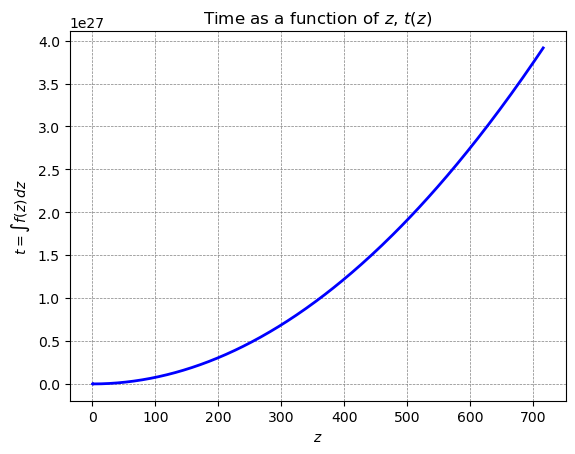

In [107]:
plt.plot(z_new, integral, color='blue', linewidth=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$t = \int f(z) \, dz$')
plt.title(r'Time as a function of $z$, $t(z)$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
